#### Hind Ali 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('TemplarHR.csv')
df.head()

,employee_ID,Job Title,Department,Job level,HourlyRate,Annual Rate,Employment Status,AnnualHours,YearsAtCompany,YearsInCurrentRole,Age,Gender,Visible_Minority
0,10014,Analyst,IT,3,28.69,59686,FT,2080,6,5,32,Female,1
1,10017,Clerk,Finance,1,31.04,43450,PT,1400,15,13,38,Male,0
2,10038,Tech,IT,1,22.05,45858,FT,2080,6,1,33,Male,0
3,10052,Analyst,Sales & Marketing,3,35.22,73254,FT,2080,2,1,28,Female,1
4,10072,Sales Rep,Sales & Marketing,3,20.37,42368,FT,2080,1,1,28,Male,1


In [2]:
df.dtypes

employee_ID             int64
Job Title              object
Department             object
Job level               int64
HourlyRate            float64
Annual Rate             int64
Employment Status      object
AnnualHours             int64
YearsAtCompany          int64
YearsInCurrentRole      int64
Age                     int64
Gender                 object
Visible_Minority        int64
dtype: object

### 1. Compare employee salary by gender for the company in each department. Compare salaries with years in service.

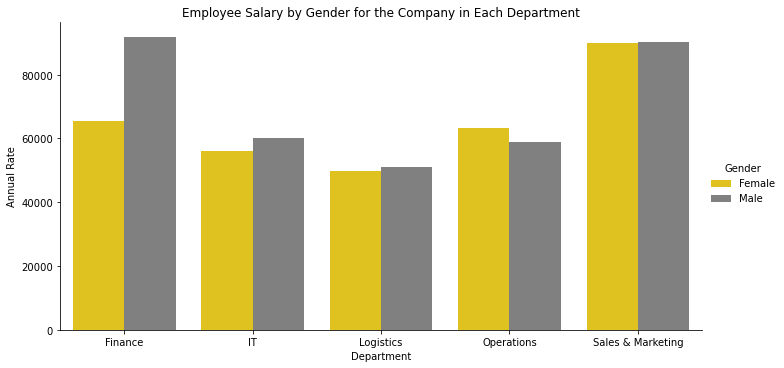

          Department  Gender   Annual Rate
0            Finance  Female  65592.690476
1            Finance    Male  91813.531915
2                 IT  Female  56141.016949
3                 IT    Male  60244.011364
4          Logistics  Female  49846.800000
5          Logistics    Male  50963.421053
6         Operations  Female  63246.274510
7         Operations    Male  58904.000000
8  Sales & Marketing  Female  90012.700000
9  Sales & Marketing    Male  90357.064935


In [3]:
# Group the data by department and gender and calculate the mean of AnnualRate
grouped = df.groupby(['Department', 'Gender'])['Annual Rate'].mean().reset_index()

# Create the plot using seaborn
sns.catplot(x='Department', y='Annual Rate', hue='Gender', data=grouped, kind='bar', height=5, aspect=2, palette = {'Female': 'gold', 'Male': 'gray'})

# Set plot labels and title
plt.xlabel('Department')
plt.ylabel('Annual Rate')
plt.title('Employee Salary by Gender for the Company in Each Department')

# Show the plot
plt.show()
print(grouped)

## Explanation:

The bar chart illustrates the annual rates for various departments based on gender. The x-axis shows the departments, while the y-axis shows the annual rates in dollars. Each department has two bars representing the average annual rate for males and females. The data reveals that Sales & Marketing has the highest average annual rate for both genders, whereas Logistics has the lowest. However, the results indicate a gender pay gap, with males earning a higher average annual rate than females across all departments except Operations. The widest gender pay gap is in Finance, where males earn an average annual rate of $91,813.53, while females earn only  $65,592.69.

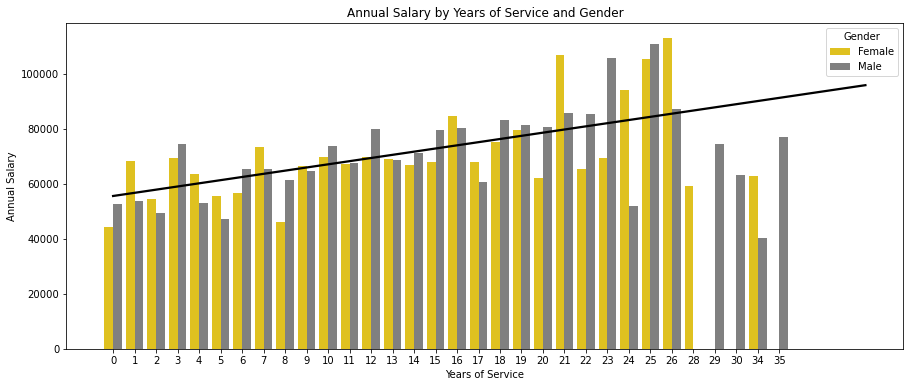

In [4]:
#Compare salaries with years in service
grouped = df.groupby(['YearsAtCompany', 'Gender'])['Annual Rate'].mean().reset_index()

gender_palette = {'Female': 'gold', 'Male': 'gray'}

plt.figure(figsize=(15, 6))
sns.barplot(x='YearsAtCompany', y='Annual Rate', hue='Gender', data=grouped, palette=gender_palette)
sns.regplot(x='YearsAtCompany', y='Annual Rate', data=df, ci = None, scatter=False, color='black')
plt.title('Annual Salary by Years of Service and Gender')
plt.xlabel('Years of Service')
plt.ylabel('Annual Salary')
plt.show()

## Explanation:

This bar chart shows the annual rate for both male and female employees based on the number of years they have worked in a company. The x-axis represents the number of years at the company, while the y-axis shows the annual rate in dollars. Each year has two bars, one for male employees and the other for female employees. The data reveals that employees who have worked for the company for a longer time generally have higher annual rates than those who have worked for a shorter time. However, the data also shows a gender pay gap in some years, with male employees earning a higher annual rate than female employees. For example, male employees who have worked for 23 years earn an annual rate of 105,612.22, whereas female employees who have worked for the same length of time earn only 69,268.20. On the other hand, female employees who have worked for 21 years earn a higher annual rate of $106,593 compared to male employees who earn an annual rate of 85,512.10. Overall, the data suggests a complex relationship between the number of years worked, gender, and annual rate in this company.

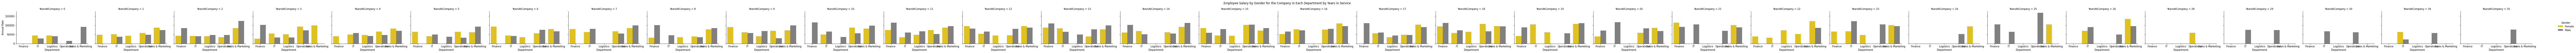

In [5]:
# Group the data by Department, Gender, and YearsAtCompany
grouped = df.groupby(['Department', 'Gender', 'YearsAtCompany']).mean().reset_index()

# Create the plot using seaborn
sns.catplot(x='Department', y='Annual Rate', hue='Gender', col='YearsAtCompany', data=grouped, kind='bar', height=3, aspect=1.5,  palette = {'Female': 'gold', 'Male': 'gray'})

# Set plot labels and title
plt.subplots_adjust(top=0.8)
plt.suptitle('Employee Salary by Gender for the Company in Each Department by Years in Service')
plt.ylabel('Annual Salary ($)')
plt.show()

## Explanaion:

These subplots are providing further insights by highlighting the variations in annual rates for both male and female employees based on their years of experience.

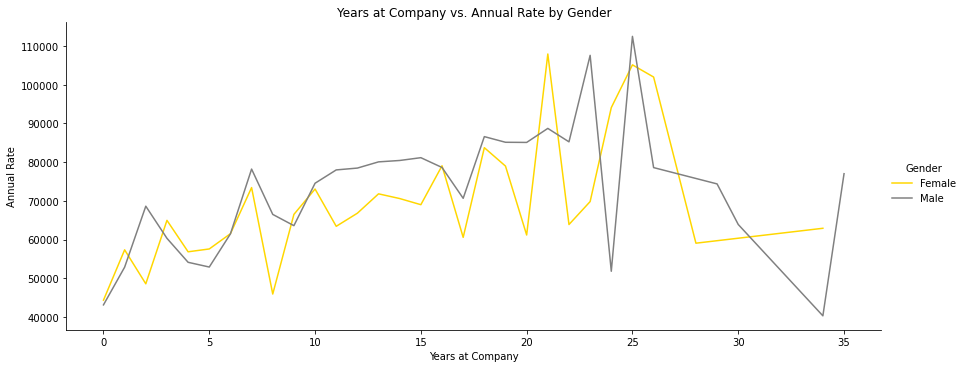

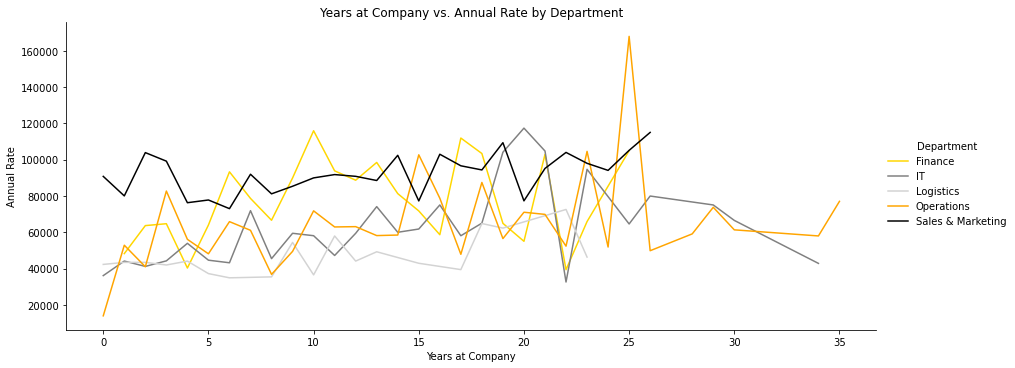

In [6]:
gender_palette = {'Female': 'gold', 'Male': 'gray'}
dept_palette = {'Finance': 'gold', 'IT': 'gray', 'Logistics': 'lightgray', 'Operations': 'orange', 'Sales & Marketing': 'black',}

sns.relplot(data=grouped, x='YearsAtCompany', y='Annual Rate', hue='Gender',kind='line',ci= None,height=5, aspect=2.5, palette=gender_palette)
plt.xlabel('Years at Company')
plt.ylabel('Annual Rate')
plt.title('Years at Company vs. Annual Rate by Gender')
plt.show()
sns.relplot(data=grouped, x='YearsAtCompany', y='Annual Rate', hue='Department',kind='line',ci= None,height=5, aspect=2.5, palette=dept_palette)
plt.xlabel('Years at Company')
plt.ylabel('Annual Rate')
plt.title('Years at Company vs. Annual Rate by Department')
plt.show()

## Explanation:

The line graph would show a general upward trend for both male and female employees, indicating that the longer an employee works for the company, the higher their annual rate. However, the data also shows that there is a gender pay gap in some years.
For example, the line graph would show a steep rise for male employees who have worked for 23 years, with a sharp increase in their annual rate to 105,612.22. In contrast, the line for female employees who have worked for the same length of time would show a much flatter trend, with a peak annual rate of only 69,268.20.
Similarly, the line for male employees who have worked for 21 years would show a slower increase in the annual rate, with a peak of 85,512.10. The line for female employees who have worked for 21 years would show a steeper increase, with a peak annual rate of 106,593.
Overall, the line graph would show a complex relationship between the number of years worked, gender, and annual rate in this company. While there is a general trend of higher annual rates for employees who have worked for the company for a longer time, the data suggests that gender plays a role in determining annual rates, with male employees earning a higher annual rate than female employees in some years.

### 2. Compare salaries by gender and minority status for job types level 2 or higher. Find if there are differences in pay for job titles in different departments.


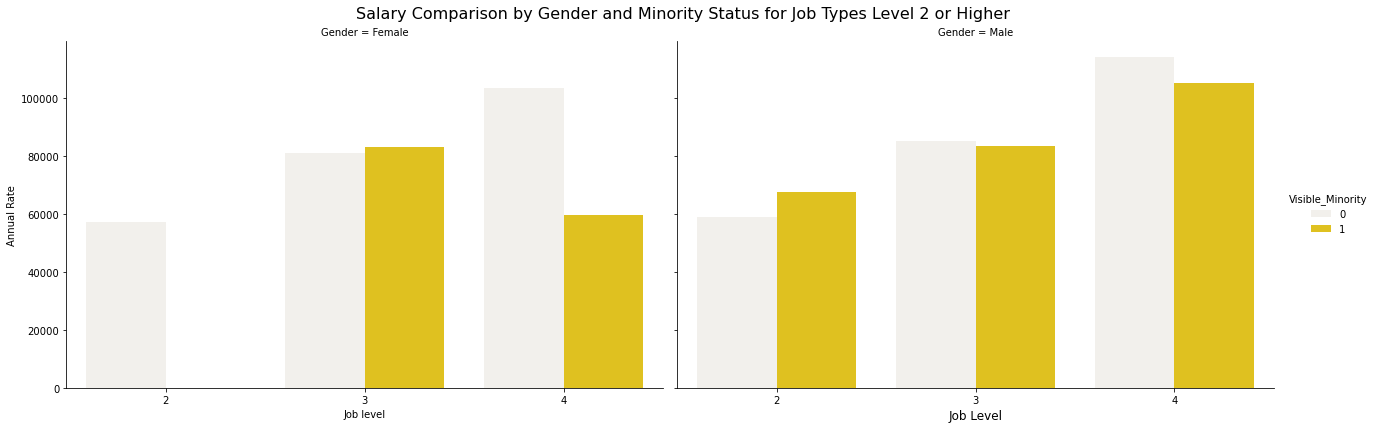

In [7]:
# Filter the data for job types level 2 or higher
filtered_data = df[df['Job level'] >= 2]

# Group the data by job title, gender, and minority status
grouped = filtered_data.groupby(['Job level', 'Gender', 'Visible_Minority']).mean().reset_index()

# Create the plot using seaborn
sns.catplot(x='Job level', y='Annual Rate', hue='Visible_Minority', col='Gender', data=grouped, kind='bar', height=6, aspect=1.5, color = 'gold')

# Set plot labels and title
plt.subplots_adjust(top=0.9)
plt.suptitle('Salary Comparison by Gender and Minority Status for Job Types Level 2 or Higher', fontsize=16)
plt.xlabel('Job Level', fontsize=12)
plt.ylabel('Average Annual Salary', fontsize=12)

# Show the plot
plt.show()


## Explanation:

The above bar chart illustrates a comparison of salaries for job types at level 2 or higher, based on gender and minority status. It indicates that job level 4 has the highest annual rate for both genders. Furthermore, males tend to have higher annual rates than females, regardless of minority status. Additionally, individuals who are not considered visible minorities have higher annual rates for both genders. Therefore, being male and not a visible minority appear to have a significant impact on annual salary and result in higher rates.

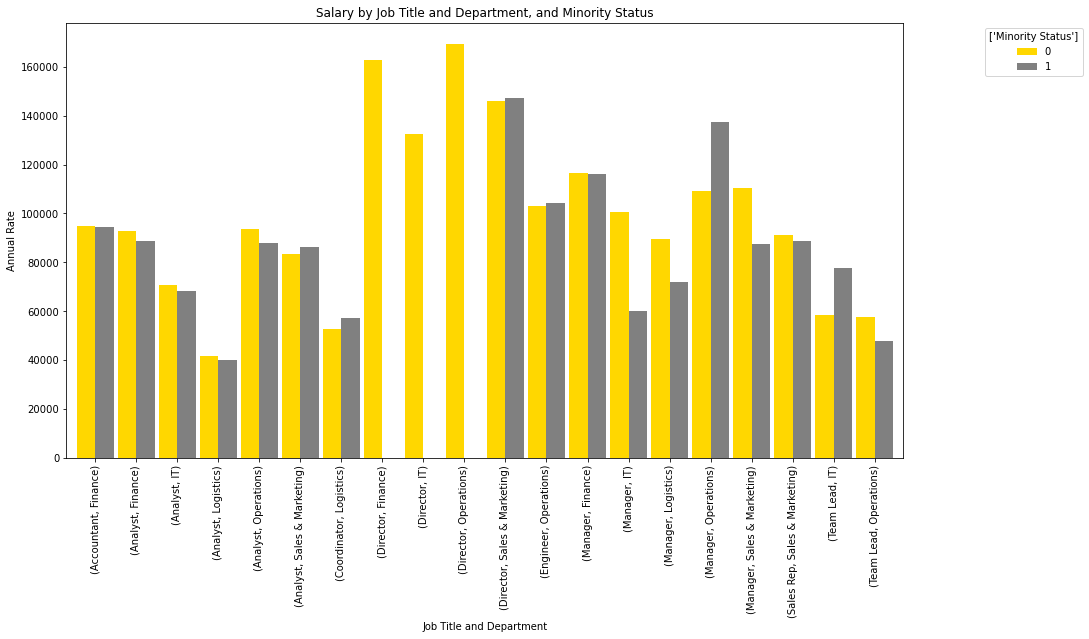

In [8]:
dfJobLevel = filtered_data.groupby(['Gender','Department','Job Title','Visible_Minority'])['Annual Rate'].mean().reset_index()

# Create a pivot table of the mean salary by job title, department, gender, and minority status
pivot_df = pd.pivot_table(dfJobLevel, values='Annual Rate', index=['Job Title', 'Department'], columns=['Visible_Minority'])

# Create a grouped bar chart of salary by job title and department, colored by gender and minority status

sns.set_palette(["gold", "gray"])
pivot_df.plot(kind='bar', figsize=(15,8), width=0.9)
plt.title('Salary by Job Title and Department, and Minority Status')
plt.xlabel('Job Title and Department')
plt.ylabel('Annual Rate')
plt.legend(title=['Minority Status'], loc='upper right', bbox_to_anchor=(1.22, 1))
plt.show()


## Explanation:

The bar chart presented displays salary information for various job titles within different departments, along with information about minority status. It highlights that there are variations in pay for different job titles across departments, with certain departments offering higher annual rates for specific job titles and minority status. the Director job title has the highest average annual rate across the Operations, IT, and Finance departments for those who are not visible minorities. On the other hand, the Analyst job title in the Logistic department has the lowest annual rate for those who are either not visible minorities or are visible minorities.

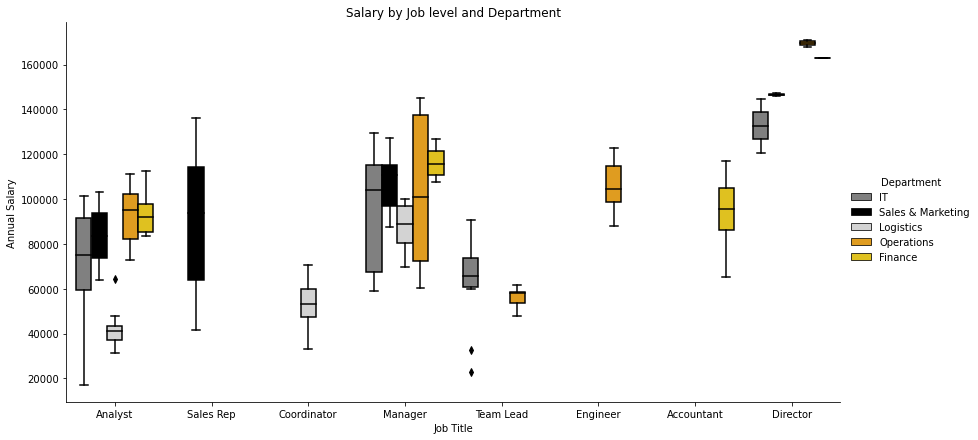

In [9]:
# Filter for job titles with level 2 or higher
df_filtered = df[df['Job level'] >= 2]

# Create the box plot using seaborn
sns.catplot(x='Job Title', y='Annual Rate', hue='Department', data=df_filtered, kind='box', height=6, aspect=2, palette=dept_palette)
# Set plot labels and title
plt.title('Salary by Job level and Department')
plt.xlabel('Job Title')
plt.ylabel('Annual Salary')
plt.show()

## Explanation:

The box plot illustrates that certain job titles in some departments pay higher annual rates than others. The Analyst role in the logistic department pays the lowest annual rate compared to other departments. Furthermore, the highest average annual rate can be observed for the Director job title in the operation department.

### 3. We want to know if the management teams (managers and directors reflect the demographics of the workforce they are managing). Can you look at each department and see how each one is doing?

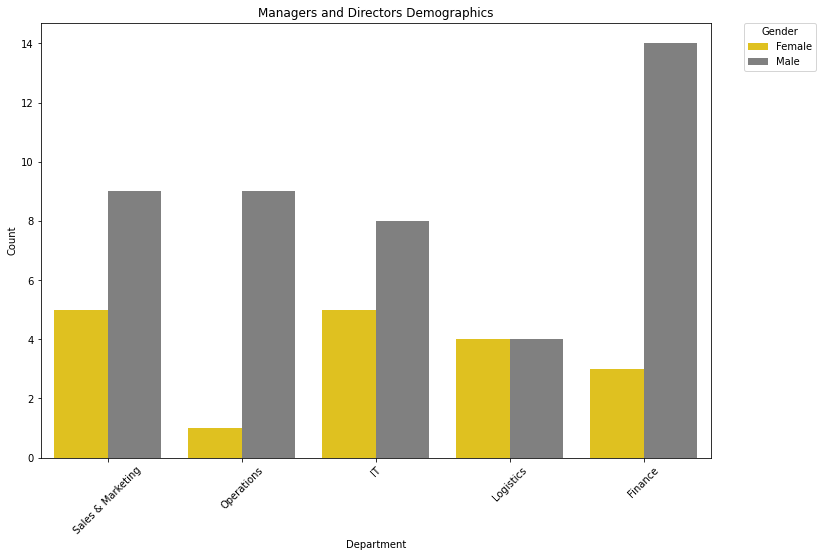

In [10]:
#We want to know if the management teams (managers and directors reflect the demographics of the workforce they are managing). Can you look at each department and see how each one is doing?

management = df[df['Job Title'].isin(['Manager', 'Director'])]

plt.figure(figsize=(12, 8))
sns.countplot(x='Department', hue='Gender', data = management, palette = gender_palette)

plt.title('Managers and Directors Demographics')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Explanation:

The given bar chart illustrates in most departments, there are more male managers or directors than female ones, except for the Logistics department where the number of male and female managers or directors is equal. Additionally, the Finance department has the highest number of managers or directors among all the departments, while the Logistics department has the lowest number of managers or directors.